In [99]:
import os
import pandas as pd
import geopandas as gp
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import matplotlib as mlt
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [76]:
path = os.getenv("PUIDATA")

In [77]:
ct_shape = gp.GeoDataFrame.from_file(path + "/nycb2010.shp")
ct_shape.crs = from_epsg(2263)
ct_latlon = ct_shape.to_crs(epsg=4326)

In [78]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [79]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374566...
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438018 40.61085506705415...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910642 40.62600632452711...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,POLYGON ((-74.08708799689826 40.61116883123923...
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511992 40.60100160655585...


In [81]:
ct_brkl = ct_latlon[ct_latlon['BoroName'] == 'Brooklyn']

In [82]:
ct_brkl.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [92]:
cusp = shapely.geometry.Point(-73.986403, 40.693217)

In [93]:
ct_cusp = ct_brkl[ct_brkl.geometry.contains(cusp)]

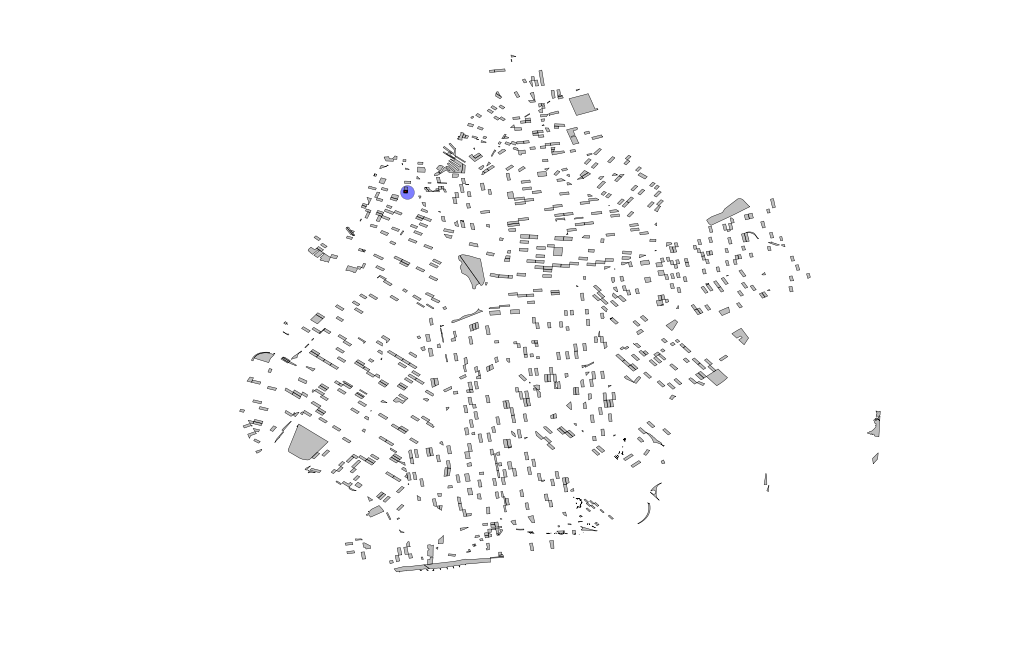

In [105]:
ax = ct_brkl[::10].plot(figsize=(12,12), linewidth=0.3, color='grey', alpha=0.5)
ct_cusp.plot(ax=ax, alpha=1, color='red', linewidth=1)
plt.scatter(-73.986403, 40.693217, c='blue', s=100, alpha=0.5)
ax.set_axis_off()